In [1]:
import pandas as pd 
import numpy as np

In [2]:
df = pd.read_csv('eye_gender_data\Training_set.csv')
df.head()

,filename,label
0,Image_1.jpg,male
1,Image_2.jpg,female
2,Image_3.jpg,female
3,Image_4.jpg,female
4,Image_5.jpg,male


In [ ]:
import os

folder_path = r'C:\Users\DELL\Desktop\Eye_Gender\eye_gender_data\train'

def fix_path(im_path,f_path):
    return os.path.join(f_path, im_path)

o_img = df['filename']
df['New_image_path'] = df['filename'].apply(lambda x: fix_path(x, folder_path))
df.head()

,filename,label,New_image_path
0,Image_1.jpg,male,C:\Users\DELL\Desktop\Eye_Gender\eye_gender_da...
1,Image_2.jpg,female,C:\Users\DELL\Desktop\Eye_Gender\eye_gender_da...
2,Image_3.jpg,female,C:\Users\DELL\Desktop\Eye_Gender\eye_gender_da...
3,Image_4.jpg,female,C:\Users\DELL\Desktop\Eye_Gender\eye_gender_da...
4,Image_5.jpg,male,C:\Users\DELL\Desktop\Eye_Gender\eye_gender_da...


In [8]:
df['label'].value_counts()

male      5058
female    4162
Name: label, dtype: int64

In [9]:
import cv2

X = []
Y = []
image_path = r'C:\Users\DELL\Desktop\Eye_Gender\eye_gender_data\train'

for image_file, label in zip(df['New_image_path'], df['label']):
    try:
        image = cv2.imread(image_file)
        if image is not None:
            img = cv2.resize(image, (60, 60))
            img = img / 255.0
            X.append(img)
            if label == "male":
                Y.append(1)
            elif label == "female":
                Y.append(0)
            else:
                print(f"Invalid label: {label}")
        else:
            print(f"Error reading image: {image_file}")
    except Exception as e:
        print(f"Error occurred: {e}")


In [10]:
print(len(X))
print(len(Y))


9220
9220


In [11]:

X = np.array(X)
Y = np.array(Y)



In [32]:
Y

array([1, 0, 0, ..., 1, 1, 0])

In [ ]:
from sklearn.model_selection import train_test_split  
x_train, x_test,y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)  

In [14]:
from tensorflow.keras.models import  Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout,Input

In [37]:
model = Sequential()

model.add(Input(shape = (60,60,3)))

model.add(Conv2D(filters = 16, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D())
model.add(Conv2D(filters = 32, kernel_size = (3, 3),activation = 'relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters = 128, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 58, 58, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 29, 29, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 27, 27, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,273 (477.63 KB)

 Trainable params: 122,273 (477.63 KB)

 Non-trainable params: 0 (0.00 B)

In [38]:
x_train[0]

array([[[0.25098039, 0.45490196, 0.63529412],
        [0.30588235, 0.50980392, 0.69019608],
        [0.24313725, 0.45098039, 0.61960784],
        ...,
        [0.73333333, 0.80784314, 1.        ],
        [0.71372549, 0.78823529, 0.98823529],
        [0.72941176, 0.79607843, 0.98823529]],

       [[0.3254902 , 0.52941176, 0.70980392],
        [0.25882353, 0.46666667, 0.63921569],
        [0.15294118, 0.36078431, 0.52941176],
        ...,
        [0.72156863, 0.8       , 0.99607843],
        [0.72941176, 0.80784314, 0.99607843],
        [0.74117647, 0.80784314, 1.        ]],

       [[0.23921569, 0.43921569, 0.61176471],
        [0.17254902, 0.37647059, 0.54117647],
        [0.14117647, 0.34509804, 0.50980392],
        ...,
        [0.70588235, 0.78039216, 0.98039216],
        [0.70980392, 0.78823529, 0.97647059],
        [0.7254902 , 0.8       , 0.98823529]],

       ...,

       [[0.48235294, 0.59607843, 0.89019608],
        [0.48627451, 0.6       , 0.89411765],
        [0.48627451, 0

In [39]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


model.fit(x_train,
        y_train,
        validation_split = 0.5,
        epochs = 50,
        verbose=1)

Epoch 1/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 8s 44ms/step - accuracy: 0.5593 - loss: 0.6899 - val_accuracy: 0.7305 - val_loss: 0.5864
Epoch 2/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.7002 - loss: 0.5620 - val_accuracy: 0.8155 - val_loss: 0.4189
Epoch 3/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.8003 - loss: 0.4307 - val_accuracy: 0.8236 - val_loss: 0.4074
Epoch 4/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.8272 - loss: 0.3773 - val_accuracy: 0.7837 - val_loss: 0.4502
Epoch 5/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.8580 - loss: 0.3488 - val_accuracy: 0.8820 - val_loss: 0.2860
Epoch 6/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.8679 - loss: 0.2944 - val_accuracy: 0.8514 - val_loss: 0.3442
Epoch 7/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.8873 - loss: 0.2964 - val_accuracy: 0.8910 - val_loss: 0.2687
Epoch 8/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - accuracy: 0.8940 - loss: 0.2501 - val_accu

In [36]:
# C:\Users\DELL\Desktop\Eye_Gender\eye_gender_data\train\Image_2.jpg

In [40]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


# Get predictions
y_pred = model.predict(x_test)


y_pred_classes = (y_pred > 0.5).astype(int)
y_test_classes = y_test 

73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step


In [41]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test_classes, y_pred_classes)
precision = precision_score(y_test_classes, y_pred_classes)
recall = recall_score(y_test_classes, y_pred_classes)
f1 = f1_score(y_test_classes, y_pred_classes)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')


Accuracy: 0.90
Precision: 0.90
Recall: 0.91
F1-score: 0.91


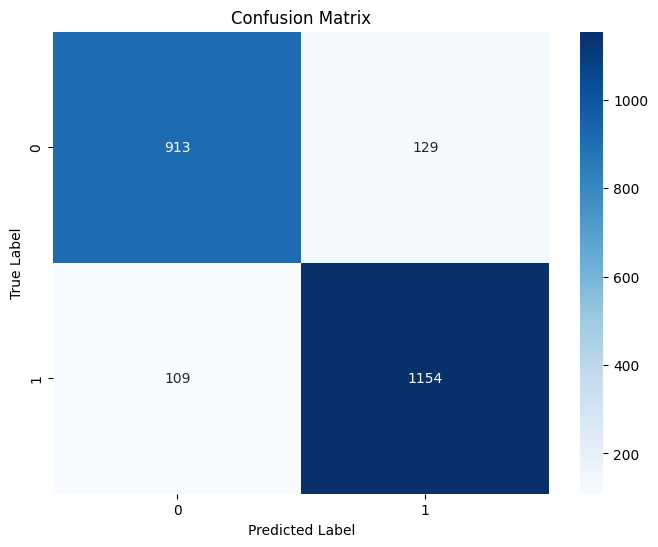


Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.88      0.88      1042
           1       0.90      0.91      0.91      1263

    accuracy                           0.90      2305
   macro avg       0.90      0.89      0.90      2305
weighted avg       0.90      0.90      0.90      2305



In [42]:


cm = confusion_matrix(y_test_classes, y_pred_classes)


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Print classification report
print('\nClassification Report:')
print(classification_report(y_test_classes, y_pred_classes))


In [53]:
def Predict_Eye_Gender(image):
    img = cv2.imread(image)
    plt.imshow(img)
    img = cv2.resize(img, (60, 60))
    img = img / 255.0
    img = np.array(img).reshape(-1, 60, 60, 3)
    prediction = model.predict(img)
    
    
    pred_class = (prediction > 0.5).astype(int)
    if pred_class == 1:
        return "Male eye detected"
    else:
        return "Female Eye detected"
    
    
  
    

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


'Female Eye detected'

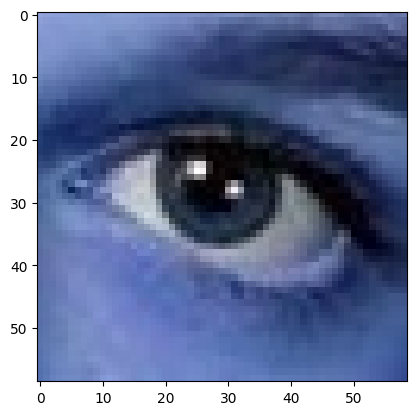

In [54]:
z= r'C:\Users\DELL\Desktop\Eye_Gender\eye_gender_data\train\Image_3.jpg'
Predict_Eye_Gender(z)